In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/training-dataset/Dataset - Updated.csv


## IMPORTING DATASETS

In [111]:
df = pd.read_csv('/kaggle/input/training-dataset/Dataset - Updated.csv')
df = df[df['Age']<100]
X = df.copy()
y = X.pop('Risk Level')

In [112]:
missing_features = X.columns[X.isnull().any()].tolist()
missing_features

['Systolic BP',
 'Diastolic',
 'BS',
 'BMI',
 'Previous Complications',
 'Preexisting Diabetes',
 'Heart Rate']

In [113]:
X.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0


In [114]:
new_index = [f + '_missing' for f in missing_features]
X[new_index] = X[missing_features].isnull().astype(int)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='constant', fill_value=-999)
X[missing_features] = imputer.fit_transform(X[missing_features])

In [105]:
X['MAP'] = ((2 * X['Diastolic']) + X['Systolic BP']) / 3

In [118]:
df = pd.concat([pd.DataFrame(X), pd.Series(y, name='target')], axis=1)
df = df.dropna(subset=['target'])

X = df.drop('target', axis=1)
y = df['target']

In [120]:
X

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Systolic BP_missing,Diastolic_missing,BS_missing,BMI_missing,Previous Complications_missing,Preexisting Diabetes_missing,Heart Rate_missing
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,0,0,0,0,0,0,0
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,0,0,0,0,0,0,0
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,41,140.0,95.0,16.0,98,22.0,0.0,0.0,1,1,90.0,0,0,0,0,0,0,0
1201,25,110.0,90.0,6.0,98,19.0,0.0,0.0,1,1,92.0,0,0,0,0,0,0,0
1202,21,150.0,110.0,4.9,98,21.5,0.0,0.0,1,1,66.0,0,0,0,0,0,0,0
1203,23,130.0,100.0,5.1,98,27.0,0.0,0.0,1,1,60.0,0,0,0,0,0,0,0


In [121]:
print(set(type(val) for val in y))

{<class 'str'>}


In [122]:
df

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Systolic BP_missing,Diastolic_missing,BS_missing,BMI_missing,Previous Complications_missing,Preexisting Diabetes_missing,Heart Rate_missing,target
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,0,0,0,0,0,0,0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,0,0,0,0,0,0,0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1200,41,140.0,95.0,16.0,98,22.0,0.0,0.0,1,1,90.0,0,0,0,0,0,0,0,High
1201,25,110.0,90.0,6.0,98,19.0,0.0,0.0,1,1,92.0,0,0,0,0,0,0,0,High
1202,21,150.0,110.0,4.9,98,21.5,0.0,0.0,1,1,66.0,0,0,0,0,0,0,0,High
1203,23,130.0,100.0,5.1,98,27.0,0.0,0.0,1,1,60.0,0,0,0,0,0,0,0,High


In [123]:
discrete_features = X.dtypes == int

## Some basic Feature Engineering

In [124]:
from sklearn.feature_selection import mutual_info_classif
def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_classif(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [125]:
mi_scores = make_mi_scores(X, y, discrete_features)

In [126]:
mi_scores

BMI                               0.435029
Heart Rate                        0.324041
BS                                0.321259
Preexisting Diabetes              0.246012
Mental Health                     0.214045
Previous Complications            0.170406
Gestational Diabetes              0.120462
Diastolic                         0.108965
Systolic BP                       0.097189
Age                               0.060793
Body Temp                         0.025961
Systolic BP_missing               0.001725
Diastolic_missing                 0.000861
BS_missing                        0.000774
Previous Complications_missing    0.000774
Preexisting Diabetes_missing      0.000774
Heart Rate_missing                0.000774
BMI_missing                       0.000246
Name: MI Scores, dtype: float64

In [24]:
X2 = X.drop('BMI',axis = 1)
y2 = X['BMI']
discrete_features1 = X2.dtypes == int
mi_scores1 = make_mi_scores(X2, y, discrete_features1)
mi_scores1

Heart Rate                        0.312888
BS                                0.312558
Preexisting Diabetes              0.270458
Mental Health                     0.214045
Previous Complications            0.171895
Diastolic                         0.125874
MAP                               0.123162
Gestational Diabetes              0.120462
Systolic BP                       0.089839
Age                               0.060793
Body Temp                         0.025961
Systolic BP_missing               0.001725
Diastolic_missing                 0.000861
BS_missing                        0.000774
Previous Complications_missing    0.000774
Preexisting Diabetes_missing      0.000774
Heart Rate_missing                0.000774
BMI_missing                       0.000246
Name: MI Scores, dtype: float64

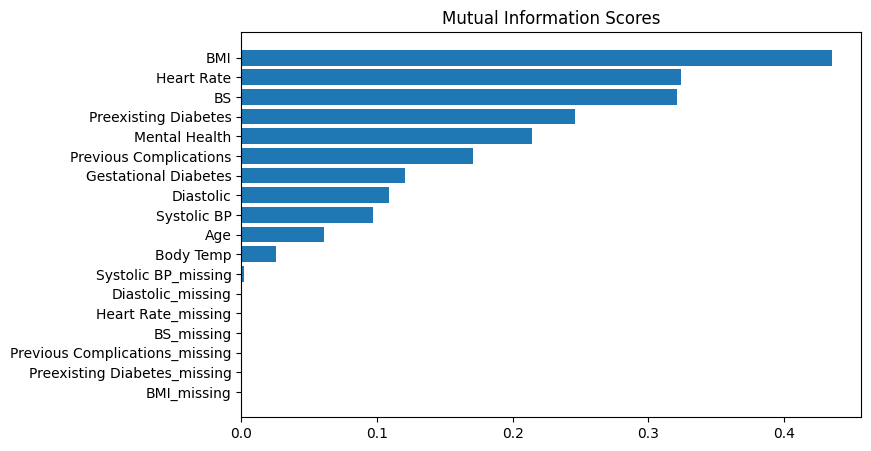

In [127]:
import matplotlib.pyplot as plt
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

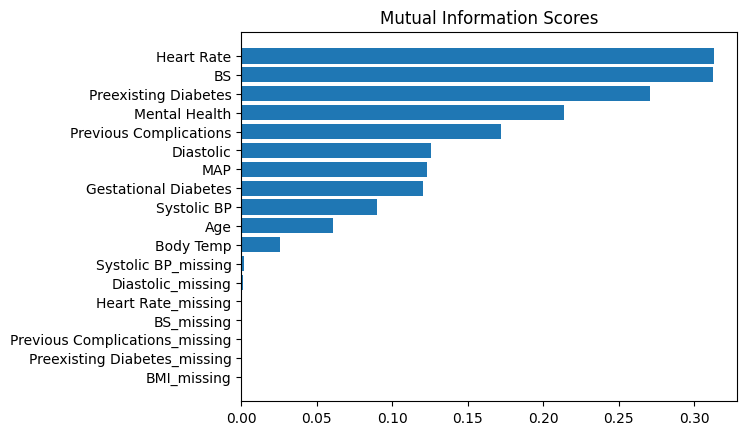

In [128]:
plot_mi_scores(mi_scores1)

In [129]:
df.head()

,Age,Systolic BP,Diastolic,BS,Body Temp,BMI,Previous Complications,Preexisting Diabetes,Gestational Diabetes,Mental Health,Heart Rate,Systolic BP_missing,Diastolic_missing,BS_missing,BMI_missing,Previous Complications_missing,Preexisting Diabetes_missing,Heart Rate_missing,target
0,22,90.0,60.0,9.0,100,18.0,1.0,1.0,0,1,80.0,0,0,0,0,0,0,0,High
1,22,110.0,70.0,7.1,98,20.4,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,Low
2,27,110.0,70.0,7.5,98,23.0,1.0,0.0,0,0,72.0,0,0,0,0,0,0,0,Low
3,20,100.0,70.0,7.2,98,21.2,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,Low
4,20,90.0,60.0,7.5,98,19.7,0.0,0.0,0,0,74.0,0,0,0,0,0,0,0,Low


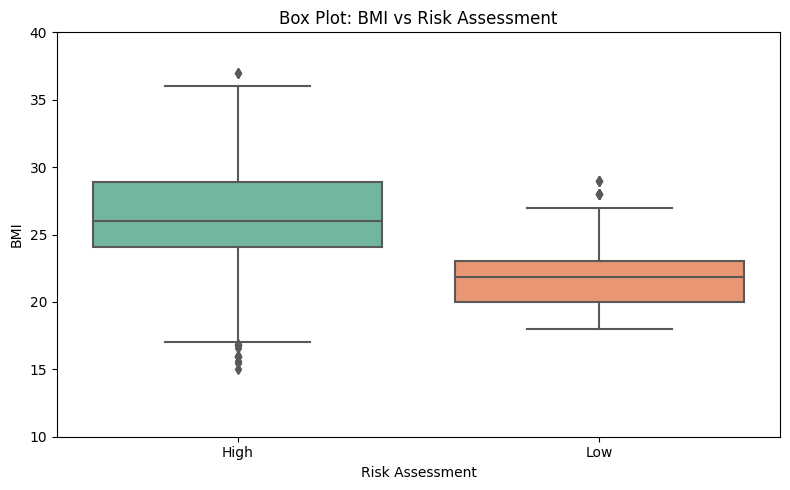

In [17]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='BMI', data=df, palette='Set2')

# Set the y-axis limit to exclude negative values (e.g., starting from 0)
plt.ylim(10, df['BMI'].max() + 3)  # Adjust 5 or any value to give some space

# Add labels and title
plt.title('Box Plot: BMI vs Risk Assessment')
plt.xlabel('Risk Assessment')
plt.ylabel('BMI')

# Show plot
plt.tight_layout()
plt.show()

BMI can be a good feature

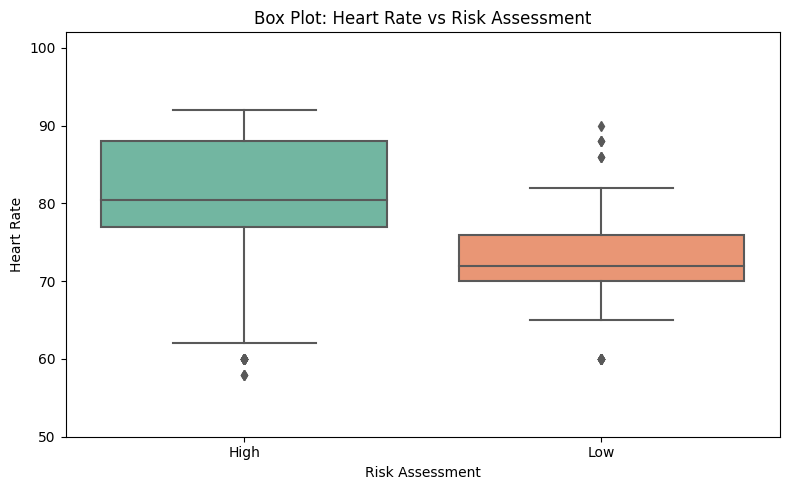

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='Heart Rate', data=df, palette='Set2')

# Set the y-axis limit to exclude negative values (e.g., starting from 0)
plt.ylim(50, df['Heart Rate'].max() + 10)  # Adjust 5 or any value to give some space

# Add labels and title
plt.title('Box Plot: Heart Rate vs Risk Assessment')
plt.xlabel('Risk Assessment')
plt.ylabel('Heart Rate')

# Show plot
plt.tight_layout()
plt.show()

Heart Rate can be a good feature

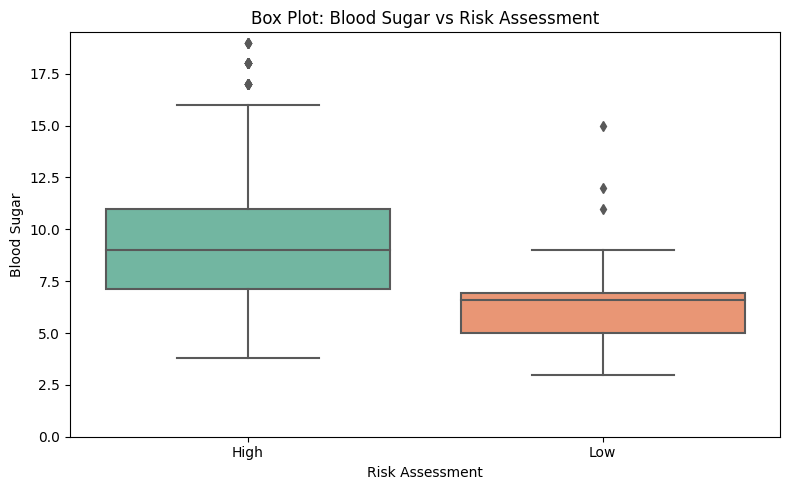

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='BS', data=df, palette='Set2')

# Set the y-axis limit to exclude negative values (e.g., starting from 0)
plt.ylim(0, df['BS'].max() + 0.5)  # Adjust 5 or any value to give some space

# Add labels and title
plt.title('Box Plot: Blood Sugar vs Risk Assessment')
plt.xlabel('Risk Assessment')
plt.ylabel('Blood Sugar')

# Show plot
plt.tight_layout()
plt.show()

Blood Sugar Level can be a good factor

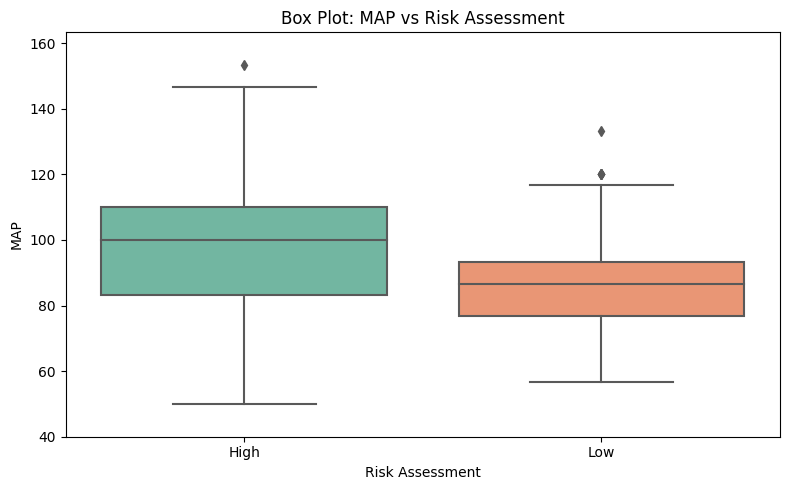

In [20]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='target', y='MAP', data=df, palette='Set2')

# Set the y-axis limit to exclude negative values (e.g., starting from 0)
plt.ylim(40, df['MAP'].max() + 10)  # Adjust 5 or any value to give some space

# Add labels and title
plt.title('Box Plot: MAP vs Risk Assessment')
plt.xlabel('Risk Assessment')
plt.ylabel('MAP')

# Show plot
plt.tight_layout()
plt.show()

MAP is a bad indicator

In [21]:
low_risk_sbp = df[df['target'] == 'Low']['Systolic BP']
print(low_risk_sbp.describe())

count    712.000000
mean     106.161517
std       84.441646
min     -999.000000
25%      100.000000
50%      120.000000
75%      120.000000
max      160.000000
Name: Systolic BP, dtype: float64


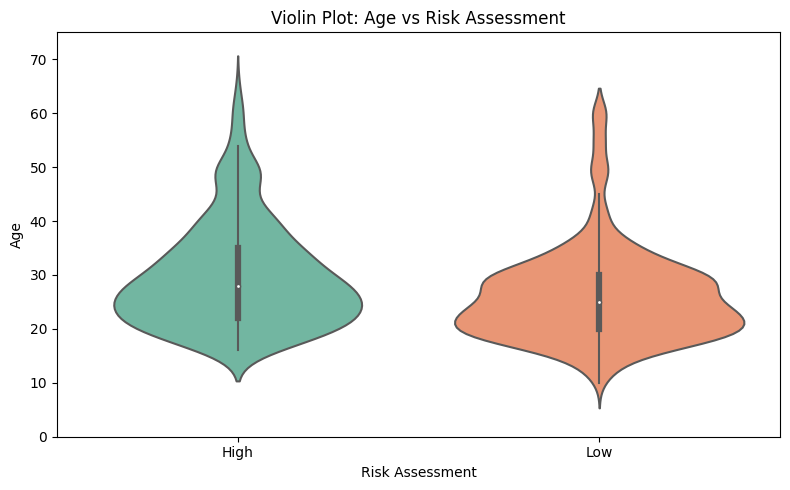

In [22]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='target', y='Age', data=df, palette='Set2')

# Set the y-axis limit to exclude negative BMI values
plt.ylim(0, df['Age'].max() + 10)  # Add a margin above the max value

# Add labels and title
plt.title('Violin Plot: Age vs Risk Assessment')
plt.xlabel('Risk Assessment')
plt.ylabel('Age')

# Show the plot
plt.tight_layout()
plt.show()

Age is a bad indicator

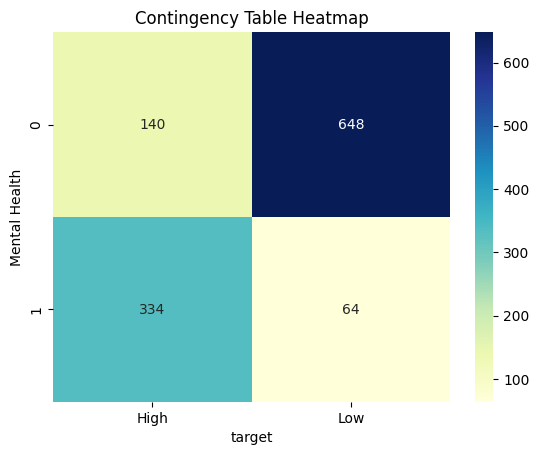

In [26]:
ct = pd.crosstab(df['Mental Health'], df['target'])

# Heatmap
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Contingency Table Heatmap')
plt.xlabel('target')
plt.ylabel('Mental Health')
plt.show()

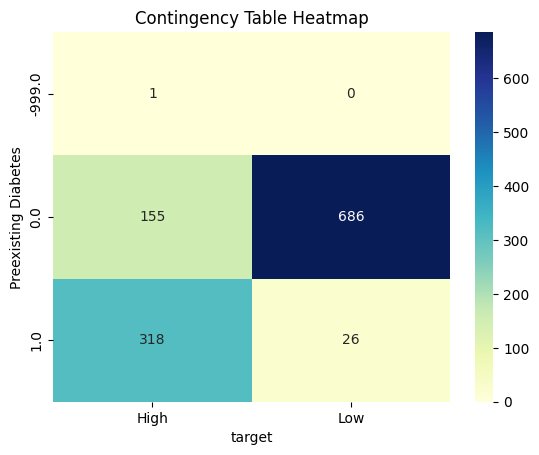

In [27]:
ct = pd.crosstab(df['Preexisting Diabetes'], df['target'])

# Heatmap
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Contingency Table Heatmap')
plt.xlabel('target')
plt.ylabel('Preexisting Diabetes')
plt.show()

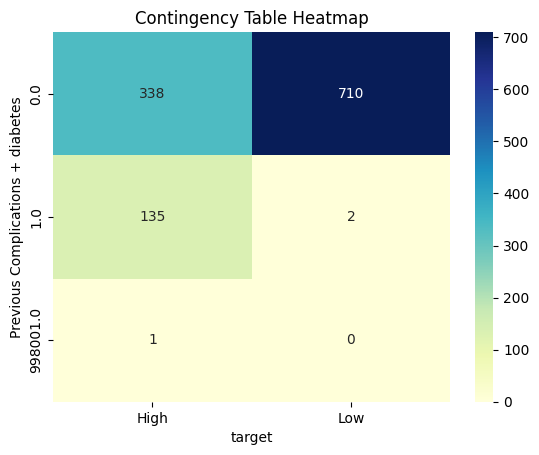

In [29]:
ct = pd.crosstab(df['Previous Complications']*df['Preexisting Diabetes'], df['target'])

# Heatmap
sns.heatmap(ct, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Contingency Table Heatmap')
plt.xlabel('target')
plt.ylabel('Previous Complications + diabetes')
plt.show()

Diabetes * Previous Complications is an execellent indicator

In [42]:
df['Target'] = [1 if f == 'High' else 0 for f in df['target'] ]

0       1
1       0
2       0
3       0
4       0
       ..
1200    1
1201    1
1202    1
1203    1
1204    1
Name: Target, Length: 1186, dtype: int64

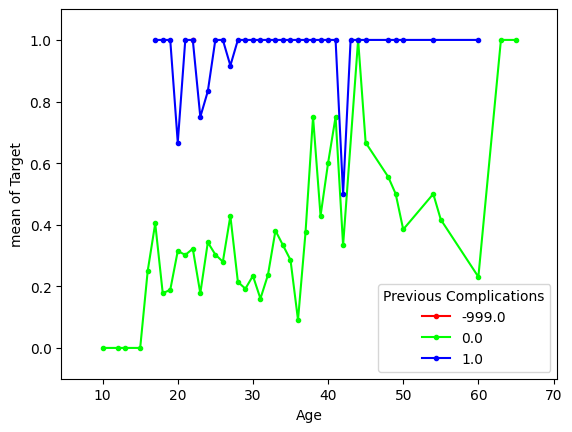

In [47]:
import statsmodels.api as sm
from statsmodels.graphics.factorplots import interaction_plot

interaction_plot(df['Age'], df['Previous Complications'], df['Target'])
plt.show()

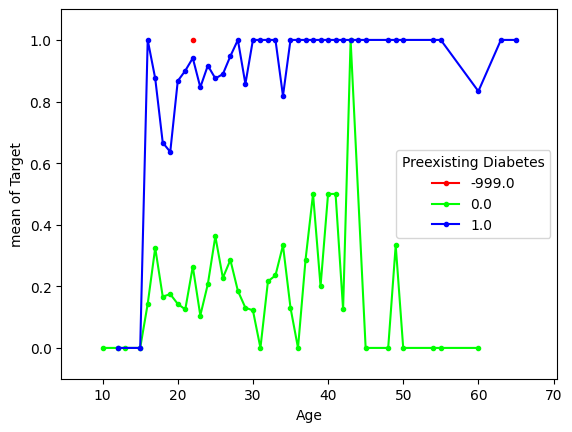

In [48]:
interaction_plot(df['Age'], df['Preexisting Diabetes'], df['Target'])
plt.show()

## Using Model

In [132]:
y = [1 if f=='High' else 0 for f in y]

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=1)

In [140]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=1000, learning_rate=0.1, missing=-999.0)
eval_set = [(X_train, y_train), (X_test, y_test)] 
model.fit(
    X_train,
    y_train,
    eval_set=eval_set,
    early_stopping_rounds=10, # Stop if no improvement after 10 rounds
    verbose=True              # To see the evaluation results
)




[0]	validation_0-logloss:0.58542	validation_1-logloss:0.59507
[1]	validation_0-logloss:0.51606	validation_1-logloss:0.52931
[2]	validation_0-logloss:0.45771	validation_1-logloss:0.47401
[3]	validation_0-logloss:0.40779	validation_1-logloss:0.42783
[4]	validation_0-logloss:0.36444	validation_1-logloss:0.38595
[5]	validation_0-logloss:0.32765	validation_1-logloss:0.35273
[6]	validation_0-logloss:0.29553	validation_1-logloss:0.32496
[7]	validation_0-logloss:0.26616	validation_1-logloss:0.29636
[8]	validation_0-logloss:0.24041	validation_1-logloss:0.27146
[9]	validation_0-logloss:0.21816	validation_1-logloss:0.25012


/usr/local/lib/python3.11/dist-packages/xgboost/sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[10]	validation_0-logloss:0.19805	validation_1-logloss:0.23055
[11]	validation_0-logloss:0.18023	validation_1-logloss:0.21337
[12]	validation_0-logloss:0.16472	validation_1-logloss:0.19870
[13]	validation_0-logloss:0.15032	validation_1-logloss:0.18590
[14]	validation_0-logloss:0.13784	validation_1-logloss:0.17379
[15]	validation_0-logloss:0.12697	validation_1-logloss:0.16269
[16]	validation_0-logloss:0.11636	validation_1-logloss:0.15357
[17]	validation_0-logloss:0.10690	validation_1-logloss:0.14561
[18]	validation_0-logloss:0.09882	validation_1-logloss:0.13818
[19]	validation_0-logloss:0.09113	validation_1-logloss:0.13194
[20]	validation_0-logloss:0.08473	validation_1-logloss:0.12609
[21]	validation_0-logloss:0.07842	validation_1-logloss:0.12119
[22]	validation_0-logloss:0.07312	validation_1-logloss:0.11536
[23]	validation_0-logloss:0.06793	validation_1-logloss:0.11136
[24]	validation_0-logloss:0.06355	validation_1-logloss:0.10727
[25]	validation_0-logloss:0.05917	validation_1-logloss:

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=-999.0, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [141]:
predictions = model.predict(X_test)
predictions

array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [145]:
y_test

[0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,


In [148]:
c=0
for i in range(len(predictions)):
    if y_test[i] == predictions[i]:
        c+=1
print(c/len(predictions))

0.9831649831649831


In [149]:
print(df['target'].value_counts(normalize=True))

target
Low     0.600337
High    0.399663
Name: proportion, dtype: float64


In [150]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions, target_names=['Low', 'High']))

              precision    recall  f1-score   support

         Low       0.99      0.98      0.99       175
        High       0.98      0.98      0.98       122

    accuracy                           0.98       297
   macro avg       0.98      0.98      0.98       297
weighted avg       0.98      0.98      0.98       297



ROC-AUC Score: 0.9978922716627634


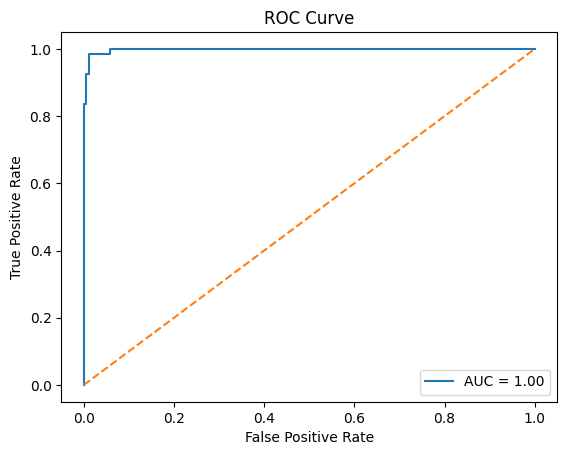

In [155]:
from sklearn.metrics import roc_auc_score, roc_curve
#y_proba = model.predict_proba(X_test)[:, 1]

# ROC AUC score
auc_score = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", auc_score)

# Plotting ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()